# Python for portfolio management

- Importer les librairies:
    - matplotlib
    - numpy
    - os
    - pandas

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

- Importer le fichier <code>sp500_constituents</code> qui se trouve dans le dossier <code>data</code>. 
- Inspecter "la tête" de ce fichier. 
- Quelles sont les colonnes à disposition ? 
- Quelle est la taille du fichier (nombre de lignes / nombre de colonnes) ? 

In [36]:
constituents = pd.read_excel('../data/sp500_constituents.xlsx',
                            index_col=0)
constituents.head()

,Instrument,Company Market Cap,GICS Sector Name,ESG Score,ESG Combined Score,ESG Controversies Score
0,POOL.OQ,1.494563e+10,Consumer Discretionary,50.774392,50.774392,100.0
1,CHRW.OQ,8.583289e+09,Industrials,34.828899,34.828899,100.0
2,AJG.N,5.290787e+10,Financials,49.931196,49.931196,100.0
3,CNP.N,1.724254e+10,Utilities,42.937080,42.937080,100.0
4,AMCR.N,1.321044e+10,Materials,75.091434,75.091434,100.0


- Calculer une moyenne du score ESG par secteur et stocker cette info dans <code>esg_score_by_sector</code>. 
- Quelle est la moyenne la plus élevée ? 
- Quel  est le secteur avec la moyenne la plus faible ? 

In [37]:
esg_score_by_sector = constituents[['GICS Sector Name', 'ESG Score']].groupby('GICS Sector Name').mean()
print('Score max:', np.max(esg_score_by_sector['ESG Score'], axis=0))
print('Worst sector:', esg_score_by_sector['ESG Score'].idxmin())
esg_score_by_sector

Score max: 72.70466482664739
Worst sector: Communication Services


,ESG Score
GICS Sector Name,
Communication Services,62.747134
Consumer Discretionary,63.525393
Consumer Staples,71.705873
Energy,67.900063
Financials,63.854948
Health Care,70.589852
Industrials,65.638683
Information Technology,66.077692
Materials,72.704665


- En plus de la moyenne, calculer le score minimum et le score maximum au sein de chaque secteur. 

In [38]:
esg_score_by_sector = constituents[['GICS Sector Name', 'ESG Score']].groupby('GICS Sector Name').agg(['mean', 'min', 'max'])
esg_score_by_sector

ESG Score                      
                             mean        min        max
GICS Sector Name                                       
Communication Services  62.747134  38.811337  81.325640
Consumer Discretionary  63.525393  29.620970  83.790570
Consumer Staples        71.705873  35.133513  91.963498
Energy                  67.900063  34.221647  87.415714
Financials              63.854948  24.629458  86.275361
Health Care             70.589852  33.315261  90.612896
Industrials             65.638683  22.651272  90.213495
Information Technology  66.077692  39.278964  88.388880
Materials               72.704665  42.106292  91.865641
Real Estate             71.178967  29.751622  88.709829
Utilities               66.360415  40.454328  82.361963

- Lister l'ensemble des fichiers du dossier <code>sp500</code> et sauver cette information dans la variable <code>files</code>.
- Créer un DataFrame vide intitulé <code>info</code>. 
- A l'aide d'une boucle <code>for</code>:
    - Lire chaque fichier séparément dans la variable <code>df</code>
    - Faire une description du fichier et le sauver dans la variable <code>row</code>
    - Ajuster le nom de la colonne au code RICS de l'action (possibilité de l'extraire à partir du nom du fichier)
    - Faire une transposée de cette variable pour avoir les infos sur une seule ligne
    - Ajouter cette ligne au DataFrame <code>info</code>

In [39]:
files = os.listdir('../data/sp500')
info = pd.DataFrame()
for file in files:
    df = pd.read_csv(os.path.join('../data/sp500', file), index_col=0, parse_dates=True)
    row = df.describe()
    row.columns = [file[:-4]]
    row = row.T
    info = pd.concat([info, row])
info.head()

,count,mean,std,min,25%,50%,75%,max
A.N,2264.0,86.948198,38.692465,33.370,53.110000,74.67000,123.1825,179.28
AAL.OQ,2264.0,29.994536,13.724111,9.040,16.300000,30.36000,42.1725,58.47
AAPL.OQ,2264.0,84.026391,56.034683,22.585,35.439375,53.86875,141.7100,198.11
ABBV.N,2264.0,97.057646,32.540603,48.270,66.845000,90.78500,117.0225,174.96
ABNB.OQ,768.0,139.322220,28.904823,82.490,116.497500,137.70500,162.2775,216.84


- Quelles sont les actions pour lesquelles il n'existe aucune valeur manquante au niveau du prix ? Quel est le nombre d'actions pour lesquelles nous avons toutes les infos ? 

In [40]:
complete_data = info[info['count'] == 2264]
complete_data.shape

(471, 8)

- Créer une liste <code>final_sample</code> qui contient les code RICS des actions pour lesquelles nous avons toutes les données. 

In [41]:
final_sample = list(complete_data.index)
# print(final_sample)

- Créer une liste vide <code>dfs</code> (pluriel de df) 
- A l'aide d'une boucle <code>for</code>:
    - Lire chaque fichier séparément
    - Changer le nom de la colonne
    - Ajouter à la liste <code>dfs</code> le DataFrame
- Utiliser la méthode <code>concat</code> de la librairie <code>pandas</code> qui permet de fusionner tous les fichiers. 
- Sauvegarder ce fichier dans le dossier <code>excel</code> sous le nom <code>sp500_prices.xlsx</code>.

In [42]:
dfs = []
for file in files:
    df = pd.read_csv(os.path.join('../data/sp500', file), index_col=0, parse_dates=True)
    df.columns = [file[:-4]]
    dfs.append(df)
    
df = pd.concat(dfs, axis=1)
df.to_excel('../excel/sp500_prices.xlsx')
df.head()

,A.N,AAL.OQ,AAPL.OQ,ABBV.N,ABNB.OQ,ABT.N,ACGL.OQ,ACN.N,ADBE.OQ,ADI.OQ,...,WYNN.OQ,XEL.OQ,XOM.N,XRAY.OQ,XYL.N,YUM.N,ZBH.N,ZBRA.OQ,ZION.OQ,ZTS.N
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,40.56,53.910,27.3325,65.89,NaN,44.90,19.496647,88.84,72.340,55.540,...,146.89,36.12,92.83,51.93,38.08,52.023557,109.226149,77.43,28.290,43.31
2015-01-05,39.80,53.875,26.5625,64.65,NaN,44.91,19.379981,87.34,71.980,54.525,...,144.39,35.71,90.29,51.57,35.71,50.966548,113.300665,76.34,27.230,43.05
2015-01-06,39.18,53.040,26.5650,64.33,NaN,44.40,19.423314,86.71,70.530,53.250,...,141.31,35.90,89.81,50.93,35.50,50.340971,112.340243,75.79,26.190,42.63
2015-01-07,39.70,53.010,26.9375,66.93,NaN,44.76,19.536647,88.53,71.110,53.810,...,145.46,36.21,90.72,52.25,35.78,52.009176,115.134198,77.72,26.435,43.51
2015-01-08,40.89,53.660,27.9725,67.63,NaN,45.68,19.876647,89.88,72.915,54.760,...,147.21,36.63,92.23,53.54,36.05,52.915184,116.356553,79.38,26.810,44.18


- Supprimer les valeurs manquantes au sein de ce fichier. 
- Vérifier à quoi sert <code>axis=0</code> ou <code>axis=1</code> dans la méthode <code>dropna</code>. 
- Vérifier à quoi sert <code>inplace=True</code> 

In [43]:
# df.dropna().info()
df.dropna(axis=0).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 2022-12-15 to 2023-12-29
Columns: 501 entries, A.N to ZTS.N
dtypes: float64(501)
memory usage: 1019.7 KB


In [44]:
df.dropna(axis=1).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2264 entries, 2015-01-02 to 2023-12-29
Columns: 471 entries, A.N to ZTS.N
dtypes: float64(471)
memory usage: 8.2 MB


In [45]:
df.dropna(axis=1, inplace=True)
df.head()

,A.N,AAL.OQ,AAPL.OQ,ABBV.N,ABT.N,ACGL.OQ,ACN.N,ADBE.OQ,ADI.OQ,ADM.N,...,WYNN.OQ,XEL.OQ,XOM.N,XRAY.OQ,XYL.N,YUM.N,ZBH.N,ZBRA.OQ,ZION.OQ,ZTS.N
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,40.56,53.910,27.3325,65.89,44.90,19.496647,88.84,72.340,55.540,52.02,...,146.89,36.12,92.83,51.93,38.08,52.023557,109.226149,77.43,28.290,43.31
2015-01-05,39.80,53.875,26.5625,64.65,44.91,19.379981,87.34,71.980,54.525,50.22,...,144.39,35.71,90.29,51.57,35.71,50.966548,113.300665,76.34,27.230,43.05
2015-01-06,39.18,53.040,26.5650,64.33,44.40,19.423314,86.71,70.530,53.250,49.23,...,141.31,35.90,89.81,50.93,35.50,50.340971,112.340243,75.79,26.190,42.63
2015-01-07,39.70,53.010,26.9375,66.93,44.76,19.536647,88.53,71.110,53.810,49.97,...,145.46,36.21,90.72,52.25,35.78,52.009176,115.134198,77.72,26.435,43.51
2015-01-08,40.89,53.660,27.9725,67.63,45.68,19.876647,89.88,72.915,54.760,49.24,...,147.21,36.63,92.23,53.54,36.05,52.915184,116.356553,79.38,26.810,44.18


- Créer un DataFrame <code>returns</code> calculé à partir des prix des actions. 
- Supprimer la première ligne (manquante suite au calcul du rendement). 

In [46]:
returns = df.pct_change().dropna()
returns.head()

,A.N,AAL.OQ,AAPL.OQ,ABBV.N,ABT.N,ACGL.OQ,ACN.N,ADBE.OQ,ADI.OQ,ADM.N,...,WYNN.OQ,XEL.OQ,XOM.N,XRAY.OQ,XYL.N,YUM.N,ZBH.N,ZBRA.OQ,ZION.OQ,ZTS.N
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,-0.018738,-0.000649,-0.028172,-0.018819,0.000223,-0.005984,-0.016884,-0.004976,-0.018275,-0.034602,...,-0.017020,-0.011351,-0.027362,-0.006932,-0.062237,-0.020318,0.037303,-0.014077,-0.037469,-0.006003
2015-01-06,-0.015578,-0.015499,0.000094,-0.004950,-0.011356,0.002236,-0.007213,-0.020144,-0.023384,-0.019713,...,-0.021331,0.005321,-0.005316,-0.012410,-0.005881,-0.012274,-0.008477,-0.007205,-0.038193,-0.009756
2015-01-07,0.013272,-0.000566,0.014022,0.040417,0.008108,0.005835,0.020990,0.008223,0.010516,0.015031,...,0.029368,0.008635,0.010133,0.025918,0.007887,0.033138,0.024870,0.025465,0.009355,0.020643
2015-01-08,0.029975,0.012262,0.038422,0.010459,0.020554,0.017403,0.015249,0.025383,0.017655,-0.014609,...,0.012031,0.011599,0.016645,0.024689,0.007546,0.017420,0.010617,0.021359,0.014186,0.015399
2015-01-09,-0.007337,-0.030563,0.001072,-0.027355,-0.010508,-0.008720,-0.001113,-0.014743,-0.000730,-0.008530,...,0.012499,-0.012285,-0.001410,-0.014569,-0.018863,-0.001767,-0.014424,0.014613,-0.027975,0.001584


- Identifier les 11 secteurs de la classification GICS et stocker ces 11 secteurs dans la variable <code>sectors</code>. 

In [47]:
sectors = constituents['GICS Sector Name'].unique()
sectors

array(['Consumer Discretionary', 'Industrials', 'Financials', 'Utilities',
       'Materials', 'Communication Services', 'Real Estate',
       'Information Technology', 'Energy', 'Consumer Staples',
       'Health Care'], dtype=object)

- Créer un DataFrame vide <code>portfolio_by_sector</code> qui a le même nombre de lignes que le DataFrame <code>returns</code> et dont les 11 colonnes correspondent aux secteurs identifiés ci-dessus.
- A l'aide d'une boucle qui parcoure chacun des secteurs:
    - garder uniquement les RICS des entreprises appartenant à ce secteur
    - vérifier si ces RICS font partie de la liste <code>final_sample</code> (s'assurer que ces RICS ont toutes les données)
    - créer un vecteur <code>weights</code> qui contient les poids équipondérés pour un portefeuille sectoriel. 
    - calculer le rendement de ce portefeuille équipondéré sectoriel
    - ajouter cette colonne au DataFrame <code>portfolio_by_sector</code>

In [48]:
portfolio_by_sector = pd.DataFrame(columns=sectors, index=returns.index)
portfolio_by_sector

for sector in sectors:
    rics_sector = list(constituents[constituents['GICS Sector Name'] == sector]['Instrument'])
    rics_sector = [rics for rics in rics_sector if rics in final_sample]
    weights = np.repeat(1/len(rics_sector), len(rics_sector))
    portfolio_return = (returns[rics_sector] @ weights)
    portfolio_by_sector[sector] = portfolio_return
portfolio_by_sector.head()

,Consumer Discretionary,Industrials,Financials,Utilities,Materials,Communication Services,Real Estate,Information Technology,Energy,Consumer Staples,Health Care
Date,,,,,,,,,,,
2015-01-05,-0.016574,-0.023485,-0.020726,-0.014171,-0.026030,-0.021534,0.002868,-0.016065,-0.044215,-0.009718,-0.006122
2015-01-06,-0.008795,-0.010141,-0.015313,-0.001744,-0.004630,-0.013462,0.007323,-0.018118,-0.015692,-0.002032,-0.007356
2015-01-07,0.022205,0.006342,0.011369,0.011325,0.009096,0.005160,0.013733,0.009101,0.003361,0.020382,0.019670
2015-01-08,0.017141,0.021825,0.017375,0.008499,0.024603,0.020585,0.004920,0.023237,0.026335,0.015283,0.017361
2015-01-09,-0.010535,-0.011348,-0.013647,-0.007447,-0.003888,-0.005917,-0.001224,-0.001671,-0.007622,-0.009200,-0.006176


- Représenter graphiquement l'évolution de ces différents portefeuilles. 

<Axes: xlabel='Date'>

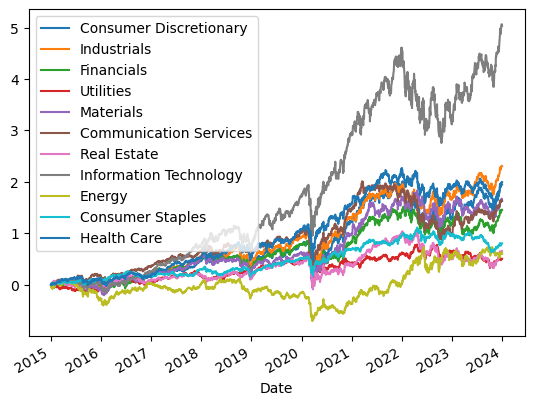

In [49]:
((portfolio_by_sector+1).cumprod() - 1).plot()

## Optimisation de portefeuille sous contrainte ESG

- Réutiliser le DataFrame <code>esg_score_by_sector</code>. 
- Renommer la colonne "ESG Score" en "Avg ESG Score by Sector". 

In [50]:
esg_score_by_sector = constituents[['GICS Sector Name', 'ESG Score']].groupby('GICS Sector Name').mean()
esg_score_by_sector.columns = ['Avg ESG Score by Sector']
esg_score_by_sector

,Avg ESG Score by Sector
GICS Sector Name,
Communication Services,62.747134
Consumer Discretionary,63.525393
Consumer Staples,71.705873
Energy,67.900063
Financials,63.854948
Health Care,70.589852
Industrials,65.638683
Information Technology,66.077692
Materials,72.704665


- Sur base du fichier <code>constituents</code>, garder uniquement les colonnes "Instrument", "GICS Sector Name", "ESG Score" et stocker dans un DataFrame <code>screening_esg</code>. 
- Faire une fusion de ce fichier avec <code>esg_score_by_sector</code>. La colonne qui sert à faire la fusion est le nom du secteur. 
- Changer l'index de ce DataFrame et utiliser le RIC de l'instrument comme index. 
- Supprimer la colonne Instrument qui devient redondante. 
- Créer une colonne "Screening" qui contient une valeur booléenne (Vrai/Faux) et qui indique si le score ESG de l'action est supérieure à la moyenne de son secteur. 

In [51]:
screening_esg = constituents[['Instrument', 'GICS Sector Name', 'ESG Score']]
screening_esg = pd.merge(left=screening_esg, 
                         right=esg_score_by_sector, 
                         left_on='GICS Sector Name',
                         right_index=True)
screening_esg.index = screening_esg['Instrument']
screening_esg.drop(columns=['Instrument'], inplace=True)
# screening_esg[screening_esg['GICS Sector Name'] == 'Consumer Discretionary']['ESG Score'].mean() 
screening_esg['Screening'] = screening_esg['ESG Score'] > screening_esg['Avg ESG Score by Sector']
screening_esg.head()

,GICS Sector Name,ESG Score,Avg ESG Score by Sector,Screening
Instrument,,,,
POOL.OQ,Consumer Discretionary,50.774392,63.525393,False
MCD.N,Consumer Discretionary,69.964738,63.525393,True
HD.N,Consumer Discretionary,68.815140,63.525393,True
LVS.N,Consumer Discretionary,68.150373,63.525393,True
LULU.OQ,Consumer Discretionary,57.583818,63.525393,False


- Créer un DataFrame vide <code>portfolio_by_sector</code> dont les colonnes sont les secteurs et l'index est le même que le DataFrame qui contient les rendements. 
- Créer un DataFrame vide <code>nb_stocks_in_portfolio</code> qui contient 2 colonnes "no-ESG" et "ESG" et dont l'index correspond aux différents secteurs. Le but de ce DataFrame est de stocker le nombre d'actions dans lequel on investit. 
- Répliquer la logique ci-dessus pour créer des portefeuilles équipondérés sectoriels en ajoutant la contrainte que l'action doit avoir un score ESG supérieur à la moyenne de son secteur. 

<Axes: xlabel='Date'>

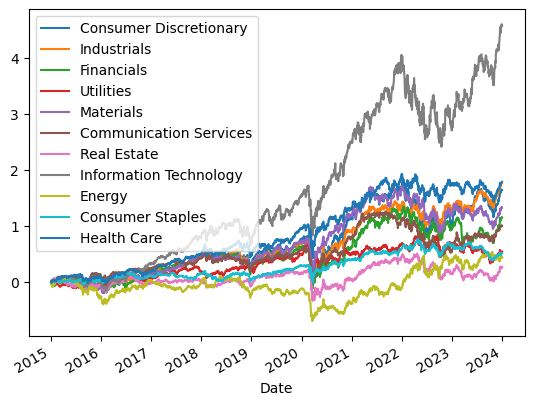

In [52]:
portfolio_by_sector = pd.DataFrame(columns=sectors, index=returns.index)
nb_stocks_in_portfolio = pd.DataFrame(columns=['no-ESG', 'ESG'], index=sectors)
portfolio_by_sector

for sector in sectors:
    rics_sector = list(constituents[constituents['GICS Sector Name'] == sector]['Instrument'])
    rics_sector = [rics for rics in rics_sector if rics in final_sample]
    # invest only if stock ESG score is >= than its sector mean
    rics_sector_esg = [rics for rics in rics_sector if screening_esg.loc[rics]['Screening'] == True]
    weights = np.repeat(1/len(rics_sector_esg), len(rics_sector_esg))
    portfolio_return = (returns[rics_sector_esg]@weights)
    portfolio_by_sector[sector] = portfolio_return
    nb_stocks_in_portfolio.loc[sector] = [len(rics_sector), len(rics_sector_esg)]
((portfolio_by_sector+1).cumprod() - 1).plot()

- Afficher le nombre d'actions dans chacun des portefeuilles (ESG/no-ESG).

In [53]:
nb_stocks_in_portfolio

,no-ESG,ESG
Consumer Discretionary,50,26
Industrials,71,43
Financials,71,37
Utilities,29,17
Materials,23,13
Communication Services,19,13
Real Estate,29,15
Information Technology,63,36
Energy,23,14
Consumer Staples,35,20


### Portefeuille de variance minimale 

- Afin de limiter le nombre de calculs à effectuer, garder uniquement les 30 premières actions (les 30 premières colonnes) dans le fichier des rendements. 

In [54]:
returns = df.pct_change().dropna()
returns = returns[returns.columns[:30]]

- Vérifier quelles sont les actions présentes et les stocker dans <code>stocks</code>. 

In [55]:
stocks = returns.columns
stocks

Index(['A.N', 'AAL.OQ', 'AAPL.OQ', 'ABBV.N', 'ABT.N', 'ACGL.OQ', 'ACN.N',
       'ADBE.OQ', 'ADI.OQ', 'ADM.N', 'ADP.OQ', 'ADSK.OQ', 'AEE.N', 'AEP.OQ',
       'AES.N', 'AFL.N', 'AIG.N', 'AIZ.N', 'AJG.N', 'AKAM.OQ', 'ALB.N',
       'ALGN.OQ', 'ALL.N', 'ALLE.N', 'AMAT.OQ', 'AMD.OQ', 'AME.N', 'AMGN.OQ',
       'AMP.N', 'AMT.N'],
      dtype='object')

- Mettre l'instrument en tant qu'index dans le DataFrame <code>constituents</code>
- Ne garder que les actions qui font partie de la liste <code>stocks</code> définie ci-dessus. 

In [56]:
constituents.index = constituents['Instrument']
constituents_esg = constituents[constituents['Instrument'].isin(stocks)]['ESG Score']
constituents_esg

Instrument
AJG.N      49.931196
AIG.N      69.226441
AIZ.N      65.955457
AMD.OQ     67.615594
AMAT.OQ    82.747198
AAL.OQ     70.967188
AMP.N      73.013299
ADI.OQ     67.618894
ALLE.N     56.272203
AEE.N      44.259418
AME.N      58.583618
ALGN.OQ    48.727916
AAPL.OQ    79.638558
ADM.N      75.583460
AMGN.OQ    76.730654
AES.N      74.216917
A.N        81.892416
AEP.OQ     77.268549
ADP.OQ     75.742016
ALB.N      71.955002
ACGL.OQ    59.681543
AMT.N      83.181132
ALL.N      72.850181
AFL.N      50.275934
ADBE.OQ    69.677907
ADSK.OQ    80.577867
AKAM.OQ    69.378371
ABBV.N     80.612407
ABT.N      83.289851
ACN.N      82.547433
Name: ESG Score, dtype: float64

- Créer un portefeuille équipondéré avec ces 30 actions.
- Calculer les rendements de ce portefeuille.
- Calculer la volatilité historique de ce portefeuille sur base de l'écart-type de ces rendements. 

In [57]:
nb_stocks = returns.shape[1]
EW_sp500 = np.repeat(1/nb_stocks, nb_stocks)
cov_mat = returns.cov()
portfolio_return = returns @ EW_sp500
np.std(portfolio_return) * np.sqrt(252)

0.20172456989589152

- Estimer la matrice de variance/covariance.
- Vérifier que vous obtenez le même chiffre en utilisant la formule matricielle. 

In [58]:
(EW_sp500 @ cov_mat @ EW_sp500.T)**0.5 * np.sqrt(252)

0.2017691548383956

- Créer 3 fonctions:
    - compute_portfolio_mean_return
    - compute_portfolio_volatility
    - compute_portfolio_esg_score

In [59]:
def compute_portfolio_mean_return(weights, returns):
    portfolio_return = returns @ weights
    return np.mean(portfolio_return) * 252

In [60]:
def compute_portfolio_volatility(weights, returns):
    cov_mat = returns.cov()
    portfolio_volatility = (weights @ cov_mat @ weights.T)**0.5 * np.sqrt(252)
    return portfolio_volatility

In [61]:
def compute_portfolio_esg_score(weights, constituents_esg):
    return constituents_esg @ weights

In [62]:
compute_portfolio_mean_return(EW_sp500, returns)

0.16794360739576344

In [63]:
compute_portfolio_volatility(EW_sp500, returns)

0.2017691548383956

In [64]:
compute_portfolio_esg_score(EW_sp500, constituents_esg)

70.00062073022215

- Importer la librairie <code>scipy</code>, et plus spécifiquement le sous-module <code>optimize</code>. 
- Créer une fonction qui permet de minimiser la volatilité d'un portefeuille
    - Ajouter la possibilité d'inclure une contrainte sur le rendement
    - Ajouter la possibilité d'inclure une contrainte sur l'ESG

In [65]:
import scipy.optimize as sco

In [66]:
def minimum_variance_portfolio(returns, return_constraint=None, esg_constraint=None):
    n = returns.shape[1]
    avg_returns = np.mean(returns, axis=0) * 252

    if (return_constraint is None) & (esg_constraint is None):
        cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    elif (return_constraint is not None) & (esg_constraint is None):
        cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
                {'type': 'eq', 'fun': lambda x: x @ avg_returns - return_constraint })
    elif (return_constraint is None) & (esg_constraint is not None):
        cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
                {'type': 'eq', 'fun': lambda x: x @ constituents_esg - esg_constraint })
    else:
        cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
                {'type': 'eq', 'fun': lambda x: x @ avg_returns - return_constraint },
                {'type': 'eq', 'fun': lambda x: x @ constituents_esg - esg_constraint })
    bnds = tuple((0,1) for x in range(n))
    init_weights = np.repeat(1.0/n, n)
    opts = sco.minimize(compute_portfolio_volatility, 
                        init_weights,
                        method='SLSQP', 
                        # bounds=bnds,
                        args=(returns),
                        constraints=cons,
                        tol=1e-5)
    
    return opts.x 

- Calculer les poids qui permettent de minimiser la volatilité du portefeuille. 

In [67]:
GMV_weights_numeric = minimum_variance_portfolio(returns)
GMV_weights_numeric

array([ 0.01664841,  0.01434161,  0.05379383,  0.11592307,  0.04613626,
        0.02219306,  0.05822659,  0.00726894,  0.05781413,  0.10923965,
       -0.05773876, -0.00047327, -0.03806372,  0.27937698, -0.03775912,
        0.10827231, -0.0267438 ,  0.09846726,  0.1589865 ,  0.08258782,
        0.01263502, -0.03120911,  0.06245028,  0.02533173, -0.04895884,
       -0.0056373 ,  0.09956077,  0.07477098, -0.26810462,  0.01066331])

- Calculer le rendement moyen associé à ces poids. 

In [68]:
compute_portfolio_mean_return(GMV_weights_numeric, returns)

0.10430129702113392

- Calculer la volatilité associée à ces poids. 

In [69]:
compute_portfolio_volatility(GMV_weights_numeric, returns)

0.1491310665622428

- Vérifier qu'on peut obtenir les poids à l'aide de la formule matricielle. 

In [70]:
ones = np.ones(nb_stocks)
GMV_weights_analytic = (np.linalg.inv(cov_mat) @ ones) / (ones.T @ np.linalg.inv(cov_mat) @ ones)
GMV_weights_analytic

array([ 0.01862022,  0.01414154,  0.05476238,  0.11683769,  0.04647491,
        0.02371691,  0.05534792,  0.00787699,  0.05935659,  0.11047511,
       -0.05478654, -0.00085235, -0.04398688,  0.28350525, -0.03594884,
        0.1079276 , -0.02536837,  0.09656771,  0.15464554,  0.08429153,
        0.01197037, -0.03143963,  0.06271067,  0.02796069, -0.05138105,
       -0.00548942,  0.09857656,  0.07171323, -0.2687609 ,  0.01053456])

- Vérifier que la volatilité obtenue est la même.

In [71]:
compute_portfolio_volatility(GMV_weights_analytic, returns)

0.14912188534121487

- Répéter cette optimisation de volatilité pour différents niveaux dans la contrainte de rendement (entre 10\% et 20\% avec des incréments de 0.5\%). 
- Stocker la volatilité et le rendement de ces différents portefeuilles dans un DataFrame.
- Représenter graphiquement la frontière efficiente. 

In [72]:
constraints = np.arange(0.10, 0.20, 0.005)
df_plot = pd.DataFrame(columns=['return', 'volatility'], index=constraints)
for constraint in constraints:
    weights = minimum_variance_portfolio(returns, constraint)
    p_return = compute_portfolio_mean_return(weights, returns)
    p_volat = compute_portfolio_volatility(weights, returns)
    df_plot.loc[constraint] = [p_return, p_volat]
df_plot

,return,volatility
0.100,0.1,0.149152
0.105,0.105,0.14913
0.110,0.11,0.149194
0.115,0.115,0.149344
0.120,0.12,0.149579
0.125,0.125,0.1499
0.130,0.13,0.150304
0.135,0.135,0.150793
0.140,0.14,0.151365
0.145,0.145,0.152019


- Répéter la procédure avec une contrainte supplémentaire : la moyenne (pondérée par les poids) des scores ESG des actions qui composent le portefeuille doit être de 80. 

In [75]:
constraints = np.arange(0.10, 0.20, 0.005)
constraint_esg = 80
df_plot_esg = pd.DataFrame(columns=['return', 'volatility'], index=constraints)
for constraint in constraints:
    weights = minimum_variance_portfolio(returns, constraint, constraint_esg)
    p_return = compute_portfolio_mean_return(weights, returns)
    p_volat = compute_portfolio_volatility(weights, returns)
    df_plot_esg.loc[constraint] = [p_return, p_volat]
df_plot_esg

,return,volatility
0.100,0.1,0.156157
0.105,0.105,0.156055
0.110,0.11,0.156035
0.115,0.115,0.156097
0.120,0.12,0.156242
0.125,0.125,0.156469
0.130,0.13,0.156778
0.135,0.135,0.157169
0.140,0.14,0.15764
0.145,0.145,0.158191


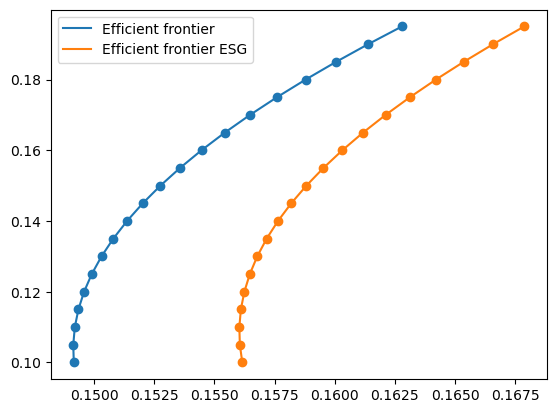

In [76]:
import matplotlib.pyplot as plt

plt.plot(df_plot['volatility'], df_plot['return'], label='Efficient frontier')
plt.scatter(df_plot['volatility'], df_plot['return'])

plt.plot(df_plot_esg['volatility'], df_plot_esg['return'], label='Efficient frontier ESG')
plt.scatter(df_plot_esg['volatility'], df_plot_esg['return'])
plt.legend()